# Spark DataFrames

We'll be working with a JSON file containing data from the 2010 U.S. Census. It has the following columns:
- `age - Age (year)
- `females - Number of females
- `males - Number of males
- `total - Total number of individuals
- `year - Year column (2010 for all rows)

### Exploring the Data

In [2]:
f = open('census_2010.json')

In [4]:
for i in range(0,5):
    print(f.readline())

{"females": 2004366, "total": 4094802, "males": 2090436, "age": 4, "year": 2010}

{"females": 2005925, "total": 4097728, "males": 2091803, "age": 5, "year": 2010}

{"females": 2007781, "total": 4101686, "males": 2093905, "age": 6, "year": 2010}

{"females": 2010281, "total": 4107361, "males": 2097080, "age": 7, "year": 2010}

{"females": 2013771, "total": 4115441, "males": 2101670, "age": 8, "year": 2010}



### Reading in the Data 

In [6]:
import findspark

In [7]:
findspark.init()

In [10]:
import pyspark

In [11]:
sc = pyspark.SparkContext()

In [12]:
from pyspark.sql import SQLContext

In [13]:
sqlCtx = SQLContext(sc)

In [14]:
df = sqlCtx.read.json("census_2010.json")

In [15]:
type(df)

pyspark.sql.dataframe.DataFrame

In [16]:
df

DataFrame[age: bigint, females: bigint, males: bigint, total: bigint, year: bigint]

### Displaying the schema

In [18]:
sqlCtx = SQLContext(sc)

In [19]:
df = sqlCtx.read.json("census_2010.json")

In [20]:
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- females: long (nullable = true)
 |-- males: long (nullable = true)
 |-- total: long (nullable = true)
 |-- year: long (nullable = true)



In [21]:
df.show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



### Row objects

In [22]:
first_five = df.head(5)[0:5]

In [25]:
first_five

[Row(age=0, females=1994141, males=2085528, total=4079669, year=2010),
 Row(age=1, females=1997991, males=2087350, total=4085341, year=2010),
 Row(age=2, females=2000746, males=2088549, total=4089295, year=2010),
 Row(age=3, females=2002756, males=2089465, total=4092221, year=2010),
 Row(age=4, females=2004366, males=2090436, total=4094802, year=2010)]

In [24]:
for each in first_five:
    print(each.age)

0
1
2
3
4


### Selecting columns

In [26]:
df[['age','males','females']].show()

+---+-------+-------+
|age|  males|females|
+---+-------+-------+
|  0|2085528|1994141|
|  1|2087350|1997991|
|  2|2088549|2000746|
|  3|2089465|2002756|
|  4|2090436|2004366|
|  5|2091803|2005925|
|  6|2093905|2007781|
|  7|2097080|2010281|
|  8|2101670|2013771|
|  9|2108014|2018603|
| 10|2114217|2023289|
| 11|2118390|2026352|
| 12|2132030|2037286|
| 13|2159943|2060100|
| 14|2195773|2089651|
| 15|2229339|2117689|
| 16|2263862|2146942|
| 17|2285295|2165852|
| 18|2285990|2168175|
| 19|2272689|2159571|
+---+-------+-------+
only showing top 20 rows



### Filtering rows

In [28]:
five_plus = df[df['age'] > 5]

In [29]:
five_plus.show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
| 20|2151448|2259690|4411138|2010|
| 21|2140926|2244039|4384965|2010|
| 22|2133510|2229168|4362678|2010|
| 23|2132897|2218195|4351092|2010|
| 24|2135789|2208905|4344694|2010|
| 25|2136497|2197148|4333645|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



### Using column comparisons as filters

In [30]:
check = df['females'] < df['males']

In [31]:
df[check].show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



### Converting Spark DataFrames to pandas DataFrames

In [35]:
import matplotlib.pyplot as plt

In [32]:
pandas_df = df.toPandas()

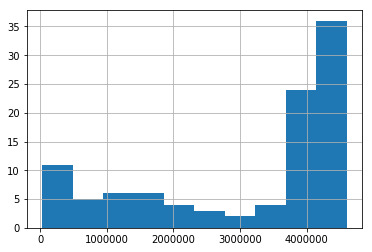

In [36]:
pandas_df['total'].hist()
plt.show()